# 데이터 시각화

### 서울시 시간 평균 대기 오염도 정보

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cx_Oracle
import my_utils as mu
import requests

In [ ]:
url = 'http://openAPI.seoul.go.kr:8088/(인증키)/xml/TimeAverageAirQuality/1/100/20211111/종로구'

In [ ]:
df = mu.get_df(url)

In [ ]:
df

In [ ]:
df.drop(['MSRSTE_NM'], axis=1, inplace=True)
df

In [ ]:
df.set_index('MSRDT', inplace=True)
df

In [21]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
df = df[::-1]

In [ ]:
df.plot(flasize=(15, 5), lenged=True, marker='o', rot=0)
plt.grid(True)
plt.xlabel('시간')
plt.ylabel('수치')
plt.tltle('종로구 시간별 오염 수치')

In [ ]:
df.plot(figsize=(15, 5), legend=True, marker='o', rot=0)
plt.grid(True)
plt.xlabel('시간')
plt.ylabel('수치')
plt.title('종로구 시간별 오염 수치')

In [ ]:
df.reset_index(inplace=True)

In [ ]:
xdata = df.NO2
ydata = df.PM10

In [ ]:
plt.figure()
plt.plot(xdata, ydata, color='y', marker='o', linestyle='None')
plt.xlabel('이산화질소농도')
plt.ylabel('미세먼지')
plt.title('산점도 그래프')
plt.grid(True)
plt.savefig('test.png')

In [ ]:
xdata = df.NO2
ydata = df.PM10
ydata2 = df.PM25

In [ ]:
plt.figure()
plt.plot(xdata, ydata, color='y', marker='o', linestyle='none', label='미세먼지')
plt.plot(xdata, ydata2, color='r', marker='o', linestyle='none', label='초미세먼지')
plt.xlabel('이산화질소농도')
plt.ylabel('(초)미세먼지')
plt.title('산점도 그래프')
plt.legend()
plt.grid(True)

In [117]:
mu.db_open()
match_df = mu.sql_excute('select * from match_data')
timeline_df = mu.sql_excute('select * from timeline_data')
mu.db_close()

open!
close!


In [118]:
tmp_df = pd.merge(match_df, timeline_df, on=['GAMEID','PARTICIPANTID'])\
            [['TEAMPOSITION','TOTALDAMAGEDEALTTOCHAMPIONS','TOTALDAMAGETAKEN','G_15']]

In [119]:
tmp_df

,TEAMPOSITION,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G_15
0,MIDDLE,15259,14330,6539
1,BOTTOM,9519,17111,4258
2,UTILITY,9288,10394,4147
3,TOP,32716,43435,6273
4,JUNGLE,8093,32736,4232
...,...,...,...,...
30475,TOP,19832,23591,4888
30476,JUNGLE,17172,28167,6122
30477,MIDDLE,5491,24404,3541
30478,BOTTOM,15477,23667,4901


In [120]:
tmp_df = tmp_df[~tmp_df.TEAMPOSITION.isna()]
tmp_df

,TEAMPOSITION,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G_15
0,MIDDLE,15259,14330,6539
1,BOTTOM,9519,17111,4258
2,UTILITY,9288,10394,4147
3,TOP,32716,43435,6273
4,JUNGLE,8093,32736,4232
...,...,...,...,...
30475,TOP,19832,23591,4888
30476,JUNGLE,17172,28167,6122
30477,MIDDLE,5491,24404,3541
30478,BOTTOM,15477,23667,4901


In [121]:
my_tmp = tmp_df[tmp_df.TEAMPOSITION=='JUNGLE']
my_tmp

,TEAMPOSITION,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G_15
4,JUNGLE,8093,32736,4232
9,JUNGLE,26964,47297,6500
14,JUNGLE,21702,42374,7212
19,JUNGLE,33155,46839,9703
24,JUNGLE,15359,36342,6295
...,...,...,...,...
30456,JUNGLE,16822,31875,5431
30461,JUNGLE,34152,40176,6961
30466,JUNGLE,51760,52574,7504
30471,JUNGLE,11072,27293,4214


In [ ]:
xdata = my_tmp.G_15
ydata = my_tmp.TOTALDAMAGEDEALTTOCHAMPIONS

plt.figure()
plt.plot(xdata, ydata, color='y', marker='o', linestyle='None')
plt.xlabel('15분 골드')
plt.ylabel('딜량')
plt.title('딜량에 따른 5분 골드 획득량 관계')
plt.grid(True)

In [ ]:
xdata = my_tmp.G_15
ydata = my_tmp.TOTALDAMAGEDEALTTOCHAMPIONS
ydata2 = my_tmp.TOTALDAMAGETAKEN

plt.figure()
plt.plot(xdata, ydata, color='y', marker='o', linestyle='none', label='딜량')
plt.plot(xdata, ydata2, color='r', marker='o', linestyle='none', label='받은데미지')
plt.xlabel('15분 골드')
plt.ylabel('딜량')
plt.title('딜량에 따른 5분 골드 획득량 관계')
plt.legend()
plt.grid(True)

In [ ]:
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

ax_main.scatter('NO2','PM10', color='r', data=df)
ax_right.hist(df.PM10, 40, orientation='horizontal', color='lightblue')
ax_bottom.hist(df.NO2, 40, orientation='vertical', color='lightpink')

In [ ]:
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

ax_main.scatter('G_15','TOTALDAMAGEDEALTTOCHAMPIONS', color='r', data=my_tmp)
ax_right.hist(df.PM10, 40, orientation='horizontal', color='lightblue')
ax_bottom.hist(df.NO2, 40, orientation='vertical', color='lightpink')

In [ ]:
df

In [ ]:
plt.figure()
plt.bar(df.MSRDT[:7], df.PM10[:7], color=['b','g','r','c','m','y','k'])
plt.xticks(rotation=45)
plt.xlabel('시간')
plt.ylabel('미세먼지')
plt.title('시간별 미세먼지 막대 그래프')

mean_val = df.PM10[:7].mean()
plt.axhline(y=mean_val, color='r', linewidth=1, linestyle='dashed')

In [ ]:
my_tmp = tmp_df.groupby(['TEAMPOSITION']).mean().round().reset_index()
my_tmp

In [ ]:
plt.figure()
plt.bar(my_tmp.TEAMPOSITION, my_tmp.TOTALDAMAGETAKEN, color=['b','g','r','c','m'])
plt.xticks(rotation=45)
plt.xlabel('포지션')
plt.ylabel('딜량')
plt.title('포지션별 평균 딜량')

mean_val = my_tmp.TOTALDAMAGETAKEN.mean()
plt.axhline(y=mean_val, color='r', linewidth=1, linestyle='dashed')

In [2]:
url = 'http://openAPI.seoul.go.kr:8088/(인증키)/xml/TbCorona19CountStatusJCG/1/1000/'

In [3]:
df = mu.get_df(url)

In [4]:
df

,JCG_DT,JONGNO,JONGNOADD,JUNGGU,JUNGGUADD,YONGSAN,YONGSANADD,SEONGDONG,SEONGDONGADD,GWANGJIN,...,SEOCHOADD,GANGNAM,GANGNAMADD,SONGPA,SONGPAADD,GANGDONG,GANGDONGADD,ETC,ETCADD,WORK_DTTM
0,2021.11.12.00,2295,13,2273,16,3339,19,3547,18,4294,...,22,8275,31,8081,52,5284,50,9006,61,2021-11-12 12:11:43.0
1,2021.11.11.00,2282,13,2257,18,3320,16,3529,25,4269,...,50,8243,30,8029,70,5234,50,8943,47,2021-11-11 19:11:43.0
2,2021.11.10.00,2269,22,2239,16,3304,19,3504,24,4242,...,25,8213,39,7959,72,5184,50,8889,50,2021-11-10 19:11:43.0
3,2021.11.09.00,2247,7,2223,15,3285,10,3480,25,4221,...,22,8174,41,7887,40,5134,27,8839,22,2021-11-09 19:11:45.0
4,2021.11.08.00,2240,6,2208,12,3275,10,3455,16,4208,...,26,8133,31,7847,46,5107,34,8818,51,2021-11-08 19:11:43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,20,,,,,,,,,,...,,,,,,,,,,
644,20,,,,,,,,,,...,,,,,,,,,,
645,20,,,,,,,,,,...,,,,,,,,,,
646,20,,,,,,,,,,...,,,,,,,,,,


In [5]:
df = df[df.JONGNO!='']
df

,JCG_DT,JONGNO,JONGNOADD,JUNGGU,JUNGGUADD,YONGSAN,YONGSANADD,SEONGDONG,SEONGDONGADD,GWANGJIN,...,SEOCHOADD,GANGNAM,GANGNAMADD,SONGPA,SONGPAADD,GANGDONG,GANGDONGADD,ETC,ETCADD,WORK_DTTM
0,2021.11.12.00,2295,13,2273,16,3339,19,3547,18,4294,...,22,8275,31,8081,52,5284,50,9006,61,2021-11-12 12:11:43.0
1,2021.11.11.00,2282,13,2257,18,3320,16,3529,25,4269,...,50,8243,30,8029,70,5234,50,8943,47,2021-11-11 19:11:43.0
2,2021.11.10.00,2269,22,2239,16,3304,19,3504,24,4242,...,25,8213,39,7959,72,5184,50,8889,50,2021-11-10 19:11:43.0
3,2021.11.09.00,2247,7,2223,15,3285,10,3480,25,4221,...,22,8174,41,7887,40,5134,27,8839,22,2021-11-09 19:11:45.0
4,2021.11.08.00,2240,6,2208,12,3275,10,3455,16,4208,...,26,8133,31,7847,46,5107,34,8818,51,2021-11-08 19:11:43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,2020.03.03.10,11,0,0,0,0,0,3,0,2,...,1,9,1,12,0,4,0,10,0,
621,2020.03.02.10,11,0,0,0,0,0,3,0,2,...,0,8,1,12,0,4,0,10,0,
622,2020.03.01.10,11,0,0,0,0,0,3,0,1,...,0,7,1,12,0,4,0,10,1,
623,2020.02.29.10,11,0,0,0,0,0,3,1,1,...,0,6,3,12,3,4,1,9,0,


In [6]:
def date_preprocessing(d):
    d_lst = d.split('.')
    res = ''.join(d_lst[:3])
    return int(res)

In [7]:
df['JCG_DT'] = df.apply(lambda x: date_preprocessing(x.JCG_DT), axis=1)

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df

,JCG_DT,JONGNO,JONGNOADD,JUNGGU,JUNGGUADD,YONGSAN,YONGSANADD,SEONGDONG,SEONGDONGADD,GWANGJIN,...,SEOCHOADD,GANGNAM,GANGNAMADD,SONGPA,SONGPAADD,GANGDONG,GANGDONGADD,ETC,ETCADD,WORK_DTTM
0,20211112,2295,13,2273,16,3339,19,3547,18,4294,...,22,8275,31,8081,52,5284,50,9006,61,2021-11-12 12:11:43.0
1,20211111,2282,13,2257,18,3320,16,3529,25,4269,...,50,8243,30,8029,70,5234,50,8943,47,2021-11-11 19:11:43.0
2,20211110,2269,22,2239,16,3304,19,3504,24,4242,...,25,8213,39,7959,72,5184,50,8889,50,2021-11-10 19:11:43.0
3,20211109,2247,7,2223,15,3285,10,3480,25,4221,...,22,8174,41,7887,40,5134,27,8839,22,2021-11-09 19:11:45.0
4,20211108,2240,6,2208,12,3275,10,3455,16,4208,...,26,8133,31,7847,46,5107,34,8818,51,2021-11-08 19:11:43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,20200303,11,0,0,0,0,0,3,0,2,...,1,9,1,12,0,4,0,10,0,
621,20200302,11,0,0,0,0,0,3,0,2,...,0,8,1,12,0,4,0,10,0,
622,20200301,11,0,0,0,0,0,3,0,1,...,0,7,1,12,0,4,0,10,1,
623,20200229,11,0,0,0,0,0,3,1,1,...,0,6,3,12,3,4,1,9,0,


In [9]:
df.set_index('JCG_DT', inplace=True)
df

,JONGNO,JONGNOADD,JUNGGU,JUNGGUADD,YONGSAN,YONGSANADD,SEONGDONG,SEONGDONGADD,GWANGJIN,GWANGJINADD,...,SEOCHOADD,GANGNAM,GANGNAMADD,SONGPA,SONGPAADD,GANGDONG,GANGDONGADD,ETC,ETCADD,WORK_DTTM
JCG_DT,,,,,,,,,,,,,,,,,,,,,
20211112,2295,13,2273,16,3339,19,3547,18,4294,25,...,22,8275,31,8081,52,5284,50,9006,61,2021-11-12 12:11:43.0
20211111,2282,13,2257,18,3320,16,3529,25,4269,27,...,50,8243,30,8029,70,5234,50,8943,47,2021-11-11 19:11:43.0
20211110,2269,22,2239,16,3304,19,3504,24,4242,20,...,25,8213,39,7959,72,5184,50,8889,50,2021-11-10 19:11:43.0
20211109,2247,7,2223,15,3285,10,3480,25,4221,14,...,22,8174,41,7887,40,5134,27,8839,22,2021-11-09 19:11:45.0
20211108,2240,6,2208,12,3275,10,3455,16,4208,23,...,26,8133,31,7847,46,5107,34,8818,51,2021-11-08 19:11:43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200303,11,0,0,0,0,0,3,0,2,0,...,1,9,1,12,0,4,0,10,0,
20200302,11,0,0,0,0,0,3,0,2,1,...,0,8,1,12,0,4,0,10,0,
20200301,11,0,0,0,0,0,3,0,1,0,...,0,7,1,12,0,4,0,10,1,


In [12]:
tmp_lst = [20211109, 20211009, 20210811]

In [13]:
df.loc[tmp_lst]

,JONGNO,JONGNOADD,JUNGGU,JUNGGUADD,YONGSAN,YONGSANADD,SEONGDONG,SEONGDONGADD,GWANGJIN,GWANGJINADD,...,SEOCHOADD,GANGNAM,GANGNAMADD,SONGPA,SONGPAADD,GANGDONG,GANGDONGADD,ETC,ETCADD,WORK_DTTM
JCG_DT,,,,,,,,,,,,,,,,,,,,,
20211109,2247,7,2223,15,3285,10,3480,25,4221,14,...,22,8174,41,7887,40,5134,27,8839,22,2021-11-09 19:11:45.0
20211009,1831,16,1892,17,2878,25,3019,14,3706,15,...,15,7268,35,6780,35,4151,26,7557,38,2021-10-09 19:11:42.0
20210811,1103,13,1038,14,2067,27,2014,8,2271,22,...,44,4858,54,4179,48,2701,20,5402,24,2021-08-11 19:11:41.0


In [14]:
sample_df = df[['GANGSEO','GANGNAM','GANGDONG','GANGBUK']]
sample_df

,GANGSEO,GANGNAM,GANGDONG,GANGBUK
JCG_DT,,,,
20211112,5713,8275,5284,3624
20211111,5646,8243,5234,3598
20211110,5596,8213,5184,3570
20211109,5544,8174,5134,3545
20211108,5515,8133,5107,3525
...,...,...,...,...
20200303,2,9,4,0
20200302,2,8,4,0
20200301,2,7,4,0


In [15]:
sample_df = sample_df.loc[[20210115, 20210215,20210315,20210415,20210515,20210615,20210715,20210815,20210915,20211015]]

In [16]:
sample_df

,GANGSEO,GANGNAM,GANGDONG,GANGBUK
JCG_DT,,,,
20210115,1465,1043,691,570
20210215,1600,1215,857,696
20210315,1702,1376,1035,786
20210415,1885,1689,1269,907
20210515,2088,2192,1549,1139
20210615,2255,2769,1886,1354
20210715,2672,3938,2222,1571
20210815,3246,5021,2755,1937
20210915,3936,6344,3340,2283


In [17]:
def bar_stack(data, rotation, title, ylim=None, stacked=False, yticks_interval=1000):
    plt.figure()
    data.plot(kind='bar', rot=rotation, title=title, legend=True, stacked=stacked)
    
    plt.legend(loc='best')
    
    if stacked == False:
        maxlim = (int(max(data.max())/yticks_interval)+1) * yticks_interval
        values = np.arange(0, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s'%format(val,',') for val in values])
    else:
        maxlim = (int(max(data.max(axis=1))/yticks_interval)+1) * yticks_interval
        values = np.arange(0, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s'%format(val,',') for val in values])

In [18]:
sample_df = sample_df.astype({'GANGSEO':'int','GANGNAM':'int','GANGDONG':'int','GANGBUK':'int'})

<Figure size 432x288 with 0 Axes>

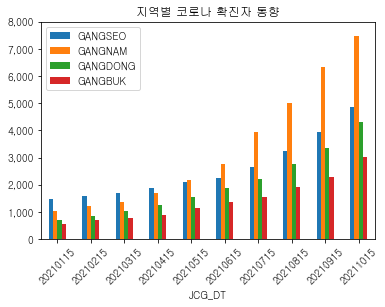

In [22]:
bar_stack(data=sample_df, rotation=45, title='지역별 코로나 확진자 동향', yticks_interval=1000)

In [23]:
sample_df

,GANGSEO,GANGNAM,GANGDONG,GANGBUK
JCG_DT,,,,
20210115,1465,1043,691,570
20210215,1600,1215,857,696
20210315,1702,1376,1035,786
20210415,1885,1689,1269,907
20210515,2088,2192,1549,1139
20210615,2255,2769,1886,1354
20210715,2672,3938,2222,1571
20210815,3246,5021,2755,1937
20210915,3936,6344,3340,2283


In [29]:
group_df = tmp_df.groupby('TEAMPOSITION').mean().round()

In [30]:
group_df

,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G_15
TEAMPOSITION,,,
BOTTOM,18626.0,17786.0,5545.0
JUNGLE,16247.0,27444.0,5580.0
MIDDLE,18468.0,20185.0,5375.0
TOP,17698.0,24398.0,5258.0
UTILITY,10399.0,15801.0,4080.0


<Figure size 432x288 with 0 Axes>

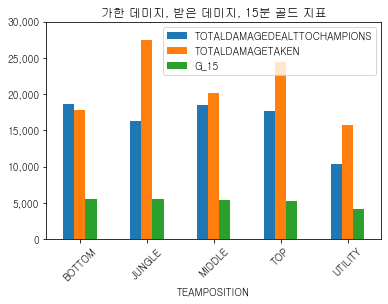

In [33]:
bar_stack(data=group_df, rotation=45, title='가한 데미지, 받은 데미지, 15분 골드 지표', yticks_interval=5000, stacked=False)

In [34]:
sample_df

,GANGSEO,GANGNAM,GANGDONG,GANGBUK
JCG_DT,,,,
20210115,1465,1043,691,570
20210215,1600,1215,857,696
20210315,1702,1376,1035,786
20210415,1885,1689,1269,907
20210515,2088,2192,1549,1139
20210615,2255,2769,1886,1354
20210715,2672,3938,2222,1571
20210815,3246,5021,2755,1937
20210915,3936,6344,3340,2283


Text(0.5, 0.98, '서브 플로팅')

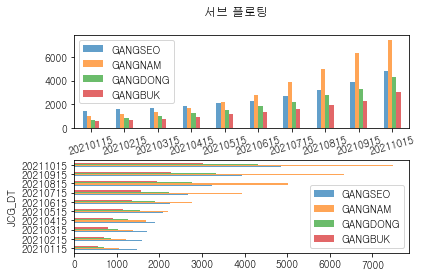

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=1)
sample_df.plot(kind='bar', ax=axes[0], rot=15, alpha=0.7)
sample_df.plot(kind='barh', ax=axes[1], alpha=0.7)
plt.subplots_adjust(hspace=0.35)
fig.suptitle('서브 플로팅')

Text(0.5, 0.98, '서브 플로팅')

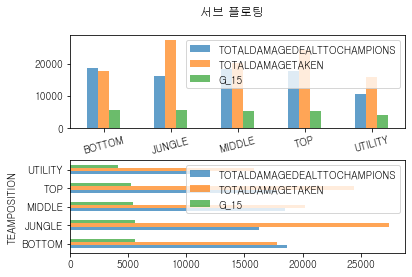

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1)
group_df.plot(kind='bar', ax=axes[0], rot=15, alpha=0.7)
group_df.plot(kind='barh', ax=axes[1], alpha=0.7)
plt.subplots_adjust(hspace=0.35)
fig.suptitle('서브 플로팅')

In [44]:
sample_df

,GANGSEO,GANGNAM,GANGDONG,GANGBUK
JCG_DT,,,,
20210115,1465,1043,691,570
20210215,1600,1215,857,696
20210315,1702,1376,1035,786
20210415,1885,1689,1269,907
20210515,2088,2192,1549,1139
20210615,2255,2769,1886,1354
20210715,2672,3938,2222,1571
20210815,3246,5021,2755,1937
20210915,3936,6344,3340,2283


Text(0.5, 1.0, '코로나 확진자 발생 동향')

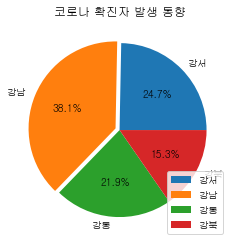

In [47]:
plt.figure()
plt.pie(sample_df.loc[20211015], labels=['강서','강남','강동','강북'], shadow=False, autopct='%1.1f%%', explode=(0,0.05,0,0))
plt.grid(True)
plt.legend(loc=4)
plt.title('코로나 확진자 발생 동향')

- 각 본인 포지션 ex) 정글 : pie차트안에 정글 포지션의 딜량, 피해량, 골드를 3분할 지표로 표기

In [50]:
group_df.loc['JUNGLE']

TOTALDAMAGEDEALTTOCHAMPIONS    16247.0
TOTALDAMAGETAKEN               27444.0
G_15                            5580.0
Name: JUNGLE, dtype: float64

Text(0.5, 1.0, '파이 차트')

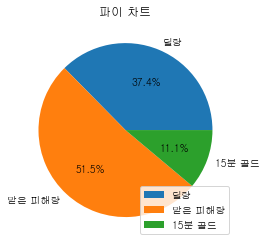

In [71]:
plt.figure()
plt.pie(group_df.loc['TOP'], labels=['딜량','받은 피해량','15분 골드'], shadow=False, autopct='%1.1f%%', explode=(0,0,0))
plt.grid(True)
plt.legend(loc=4)
plt.title('파이 차트')

In [77]:
def calc_explod(d):
    d = d.values.tolist()
    max_idx = d.index(max(d))
    lsn = [0 for i in range(len(d))]
    lsn[max_idx] = 0.05
    return lsn

Text(0.5, 1.0, '파이 차트')

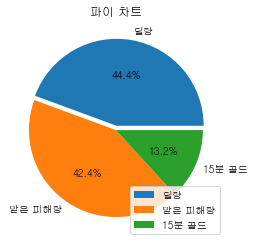

In [83]:
plt.figure()
plt.pie(group_df.loc['BOTTOM'], labels=['딜량','받은 피해량','15분 골드'], shadow=False, autopct='%1.1f%%',\
        explode=calc_explod(group_df.loc['BOTTOM']))
plt.grid(True)
plt.legend(loc=4)
plt.title('파이 차트')

In [85]:
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/landActualPriceInfo/1/1000/'
df = mu.get_df(url)

In [86]:
df

,RTMS_ID,LAND_CD,SGG_CD,SGG_NM,BJDONG10_CD,BJDONG_NM,ACC_YEAR,JOB_GBN,JOB_GBN_NM,DEAL_YMD,OBJ_SEQNO,TOT_AREA,BLDG_AREA,RIGHT_GBN,FLR_INFO,BLDG_MUSE_CD,BLDG_MUSE_NM,OBJ_AMT,BLDG_NM,BUILD_YEAR
0,11620-2021-4-0010118-1,1162010200114250004,11620,관악구,1162010200,신림동,2021,4,신고,20211112,1,0.000000,12.210000,0,10,02001,아파트,103500000,코스모그린,2012
1,11350-2021-4-0010356-1,1135010500107490005,11350,노원구,1135010500,상계동,2021,4,신고,20211112,1,0.000000,58.010000,0,15,02001,아파트,747000000,상계주공4(고층),1988
2,11440-2021-4-0011094-1,1144012500101450003,11440,마포구,1144012500,성산동,2021,4,신고,20211112,1,24.160000,39.220000,0,4,02002,연립주택,355000000,팰리스뷰,2018
3,11170-2021-4-0009830-1,1117010700100560000,11170,용산구,1117010700,동자동,2021,4,신고,20211112,1,43.840000,27.430000,0,21,14202,오피스텔,404500000,트윈시티 남산,2015
4,11260-2021-4-0010008-1,1126010100101750075,11260,중랑구,1126010100,면목동,2021,4,신고,20211112,1,27.130000,42.910000,0,5,02002,연립주택,180000000,JOY타운,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11380-2021-4-0017534-1,1138010700107600000,11380,은평구,1138010700,응암동,2021,4,신고,20211030,1,0.000000,84.370000,0,9,02001,아파트,990000000,백련산힐스테이트2차,2011
996,11380-2021-4-0017922-1,1138010800100040017,11380,은평구,1138010800,역촌동,2021,4,신고,20211030,1,32.410000,53.960000,0,5,02002,연립주택,250000000,하오빌,2010
997,11260-2021-4-0009925-1,1126010100101930001,11260,중랑구,1126010100,면목동,2021,4,신고,20211030,1,0.000000,27.000000,0,12,02001,아파트,315000000,면목한신,1987
998,11710-2021-4-0020843-1,1171011100100220000,11710,송파구,1171011100,방이동,2021,4,신고,20211030,1,61.450000,41.050000,0,7,14202,오피스텔,245000000,대우유토피아오피스텔,1999


In [87]:
my_df = df[['SGG_NM','BJDONG_NM','BLDG_MUSE_NM','OBJ_AMT','BLDG_NM','BUILD_YEAR']].copy()
my_df.columns = ['자치구명','법정동명','건물주용도','매매가','건물명','건축년도']
my_df = my_df[my_df['건물주용도'] == '아파트']
my_df['매매가'] = my_df['매매가'].astype(float)

In [88]:
my_df

,자치구명,법정동명,건물주용도,매매가,건물명,건축년도
0,관악구,신림동,아파트,1.035000e+08,코스모그린,2012
1,노원구,상계동,아파트,7.470000e+08,상계주공4(고층),1988
5,관악구,신림동,아파트,1.650000e+08,보라매해담채,2012
20,구로구,고척동,아파트,7.500000e+08,대우,1999
31,관악구,신림동,아파트,1.400000e+08,푸리마타운,2014
...,...,...,...,...,...,...
987,서대문구,홍제동,아파트,1.300000e+09,인왕산어울림,2006
992,강북구,미아동,아파트,1.135000e+09,꿈의숲롯데캐슬,2017
995,은평구,응암동,아파트,9.900000e+08,백련산힐스테이트2차,2011
997,중랑구,면목동,아파트,3.150000e+08,면목한신,1987


In [89]:
sample = my_df[['자치구명','매매가']].set_index('자치구명')
sample

,매매가
자치구명,
관악구,1.035000e+08
노원구,7.470000e+08
관악구,1.650000e+08
구로구,7.500000e+08
관악구,1.400000e+08
...,...
서대문구,1.300000e+09
강북구,1.135000e+09
은평구,9.900000e+08


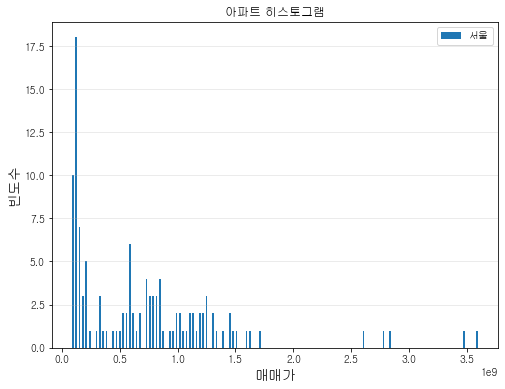

In [96]:
plt.figure(figsize = (8, 6))
plt.hist(sample, bins=len(sample), label='서울', rwidth=0.5)

plt.xlabel('매매가', size=14)
plt.ylabel('빈도수', size=14)
plt.title('아파트 히스토그램')
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)

In [103]:
g1 = sample.loc['은평구']

In [104]:
g2 = sample.loc['강동구']

Text(0.5, 1.0, '강동구')

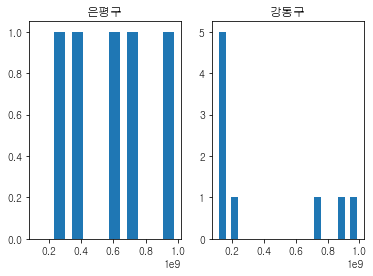

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(g1, range=(100000000, 1000000000), bins=len(g1), rwidth=0.6)
axes[1].hist(g2, range=(100000000, 1000000000), bins=len(g2), rwidth=0.6)

axes[0].set_title('은평구')
axes[1].set_title('강동구')

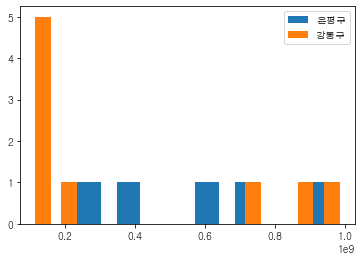

In [116]:
fig, axes = plt.subplots()

axes.hist(g1, range=(100000000, 1000000000), bins=len(g1), rwidth=0.6, label='은평구')
axes.hist(g2, range=(100000000, 1000000000), bins=len(g2), rwidth=0.6, label='강동구')
plt.legend(loc='upper right')

In [132]:
my_tmp = tmp_df[['TEAMPOSITION','TOTALDAMAGEDEALTTOCHAMPIONS']].set_index('TEAMPOSITION')

In [133]:
my_tmp

,TOTALDAMAGEDEALTTOCHAMPIONS
TEAMPOSITION,
MIDDLE,15259
BOTTOM,9519
UTILITY,9288
TOP,32716
JUNGLE,8093
...,...
TOP,19832
JUNGLE,17172
MIDDLE,5491


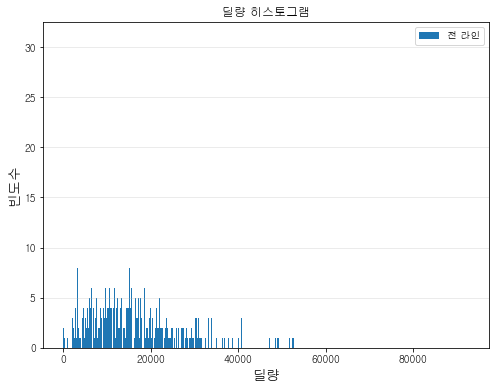

In [137]:
plt.figure(figsize=(8, 6))
plt.hist(my_tmp, bins=len(my_tmp), label='전 라인', rwidth=0.9)

plt.xlabel('딜량', size=14)
plt.ylabel('빈도수', size=14)
plt.title('딜량 히스토그램')
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)